In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


#for matrix the confution
from sklearn.metrics import  confusion_matrix
from mlxtend.plotting import  plot_confusion_matrix

#metricas
from sklearn.metrics import  roc_auc_score, roc_curve, precision_score, accuracy_score, recall_score, f1_score


# CLASS REGRESSION LOGISTIC

In [20]:
class Regression_Logistic:

    def __init__(self,alpha,epoch, batch_size = 30):

        self.w = []
        self.b = 0

        self.alpha = alpha  #hiperparametro for descend gradiend
        self.epoch = epoch   # epochs to training 
        self.loss = []       # loss array for trining
        self.loss_validation =[] #loss array for validation 
        self.time_stamp = []  #time for figure
        self.batch_size = batch_size
    
    def  hypothesis(self,x):
        
        result = x @ self.w + self.b
       # result = np.reshape(result,(len(x),1))
        return result
    


    def sigmoide(self,x):

        h = self. hypothesis(x)
        funtion_sigmoide = 1/(1 + np.exp(-h))
        return funtion_sigmoide
    

    def loss_sigmoide(self,x,y):

        regulator = 0.0000000000001
        predictions_sigmoide = self.sigmoide(x)    #matrix loss sigmoide 
        

        y_with_reshape = np.reshape(y,(len(y)  ,1))


        class_0_loss = np.dot(1 - y,np.log2(1 - self.sigmoide(x) + regulator))
        class_1_loss = np.dot(y,np.log2(self.sigmoide(x) + regulator))

        total_loss = (class_0_loss + class_1_loss ) /(-len(y))    #escaler loss sigmoide 

        total_loss_sum = np.sum((class_0_loss + class_1_loss )) / (-len(y))

        # print(f'El prediccion de los es de {}')

        return total_loss_sum, total_loss
    
    

    def derivares_loss(self,x,y):
        
        dw = (1/-len(y)) * np.sum((y - self.sigmoide(x))@ x)

        db = np.sum(y - self.sigmoide(x))*(-1/len(y))

        return dw,db
        

    def parameters_update(self,dw,db): # update_parameters
        
        self.b = self.b - self.alpha * db 
        self.w = self.w - self.alpha * dw 
        
        
        return self.w, self.b

        
    def plot_loss(self):

        plt.plot(self.time_stamp, self.loss, label='training')
        plt.plot(self.time_stamp,self.loss_validation,label='validation')
        plt.legend()
        plt.show()
    


    def train (self,x_train,y_train,x_validation, y_validation):

        # np.random().seed(2001) #semilla const
        
        self.w = np.array([np.random.rand() for i in range(len(x_train.T))]) # example len(4) [0.13 ; 2.32 ; 0.32; 21]
        self.b = np.random.rand()
        
        LL = self.loss_sigmoide(x_train,y_train)
        self.loss =[]
        self.validate = []


        for i in range( self.epoch):
            
            train_batch = resample(range(len(y_train)) , n_samples = min(self.batch_size, len(y_train)) , replace = False, random_state= 42)

            validation_batch = resample(range(len(y_validation)), n_samples = min(self.batch_size,len(y_validation)) , replace = False , random_state = 42)


            
            element_validation,loss_predic = self.loss_sigmoide(x_validation[validation_batch],y_validation[validation_batch])
            self.loss_validation.append(element_validation)

            self.time_stamp.append(i)
            

            dw_ , db_  = self.derivares_loss(x_train[train_batch] , y_train[train_batch]) # 

        

            self.parameters_update(dw_ ,db_)  # update parameters w and b 

            loss_predic , predic_array  = self.loss_sigmoide(x_train[train_batch], y_train[train_batch])

            if i % 100 == 0:
                print(f'Epoch {i}, loss: {loss_predic} (size of training ({len(x_train[train_batch])}))')

            self.loss.append(loss_predic)
        self.validate.append(self.loss_sigmoide(x_validation[validation_batch],y_validation[validation_batch]))


    def prediction(self, x_test):
        
        # if funtion sigmoide is >= 0.5 --> outplut(1)
        
        return (self.sigmoide(x_test)) >= 0.5

    

    def plot2d(self,x1,x2,y):
        
        if len(self.w) == 2:
            x_plot = np.linspace(min(x1),max(x1),30)
            
            y_plot = (-self.b - self.w[0] * x_plot)/(self.w[1])  #decision line equation in logistic regression
            
            plt.plot(x_plot,y_plot)                              #plot line regresion logistic

            c =["red" if elem >= 1 else "blue" for elem in y]    # array color condition Y


            plt.scatter(x1,x2,c = c)                             

            plt.show()        
        else:
            print("Error: el numero de dimensiones debe ser 2")

    




def data_split(X,Y):

    x_train , x_complement , y_train, y_complement = train_test_split(X,Y, test_size= 0.3, shuffle=True)   
    x_validation , x_test, y_validation, y_test = train_test_split (x_complement,y_complement, test_size= 0.66,  shuffle= True )

    return x_train , x_validation , x_test , y_train , y_validation , y_test


## EXAMPLE1 : ***Dataset : magic04.csv***


In [21]:
data = pd.read_csv('D:\Documentos\MISCURSOS\Proyectos Git Hub\MACHINE-LEARNIG\supervised_Learning\classification\dataset_classification\magic04.csv')

In [22]:
#counts dataset rows and columns
data.shape

(19020, 11)

In [23]:
#information dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [24]:
#values stadisct the columns
data.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

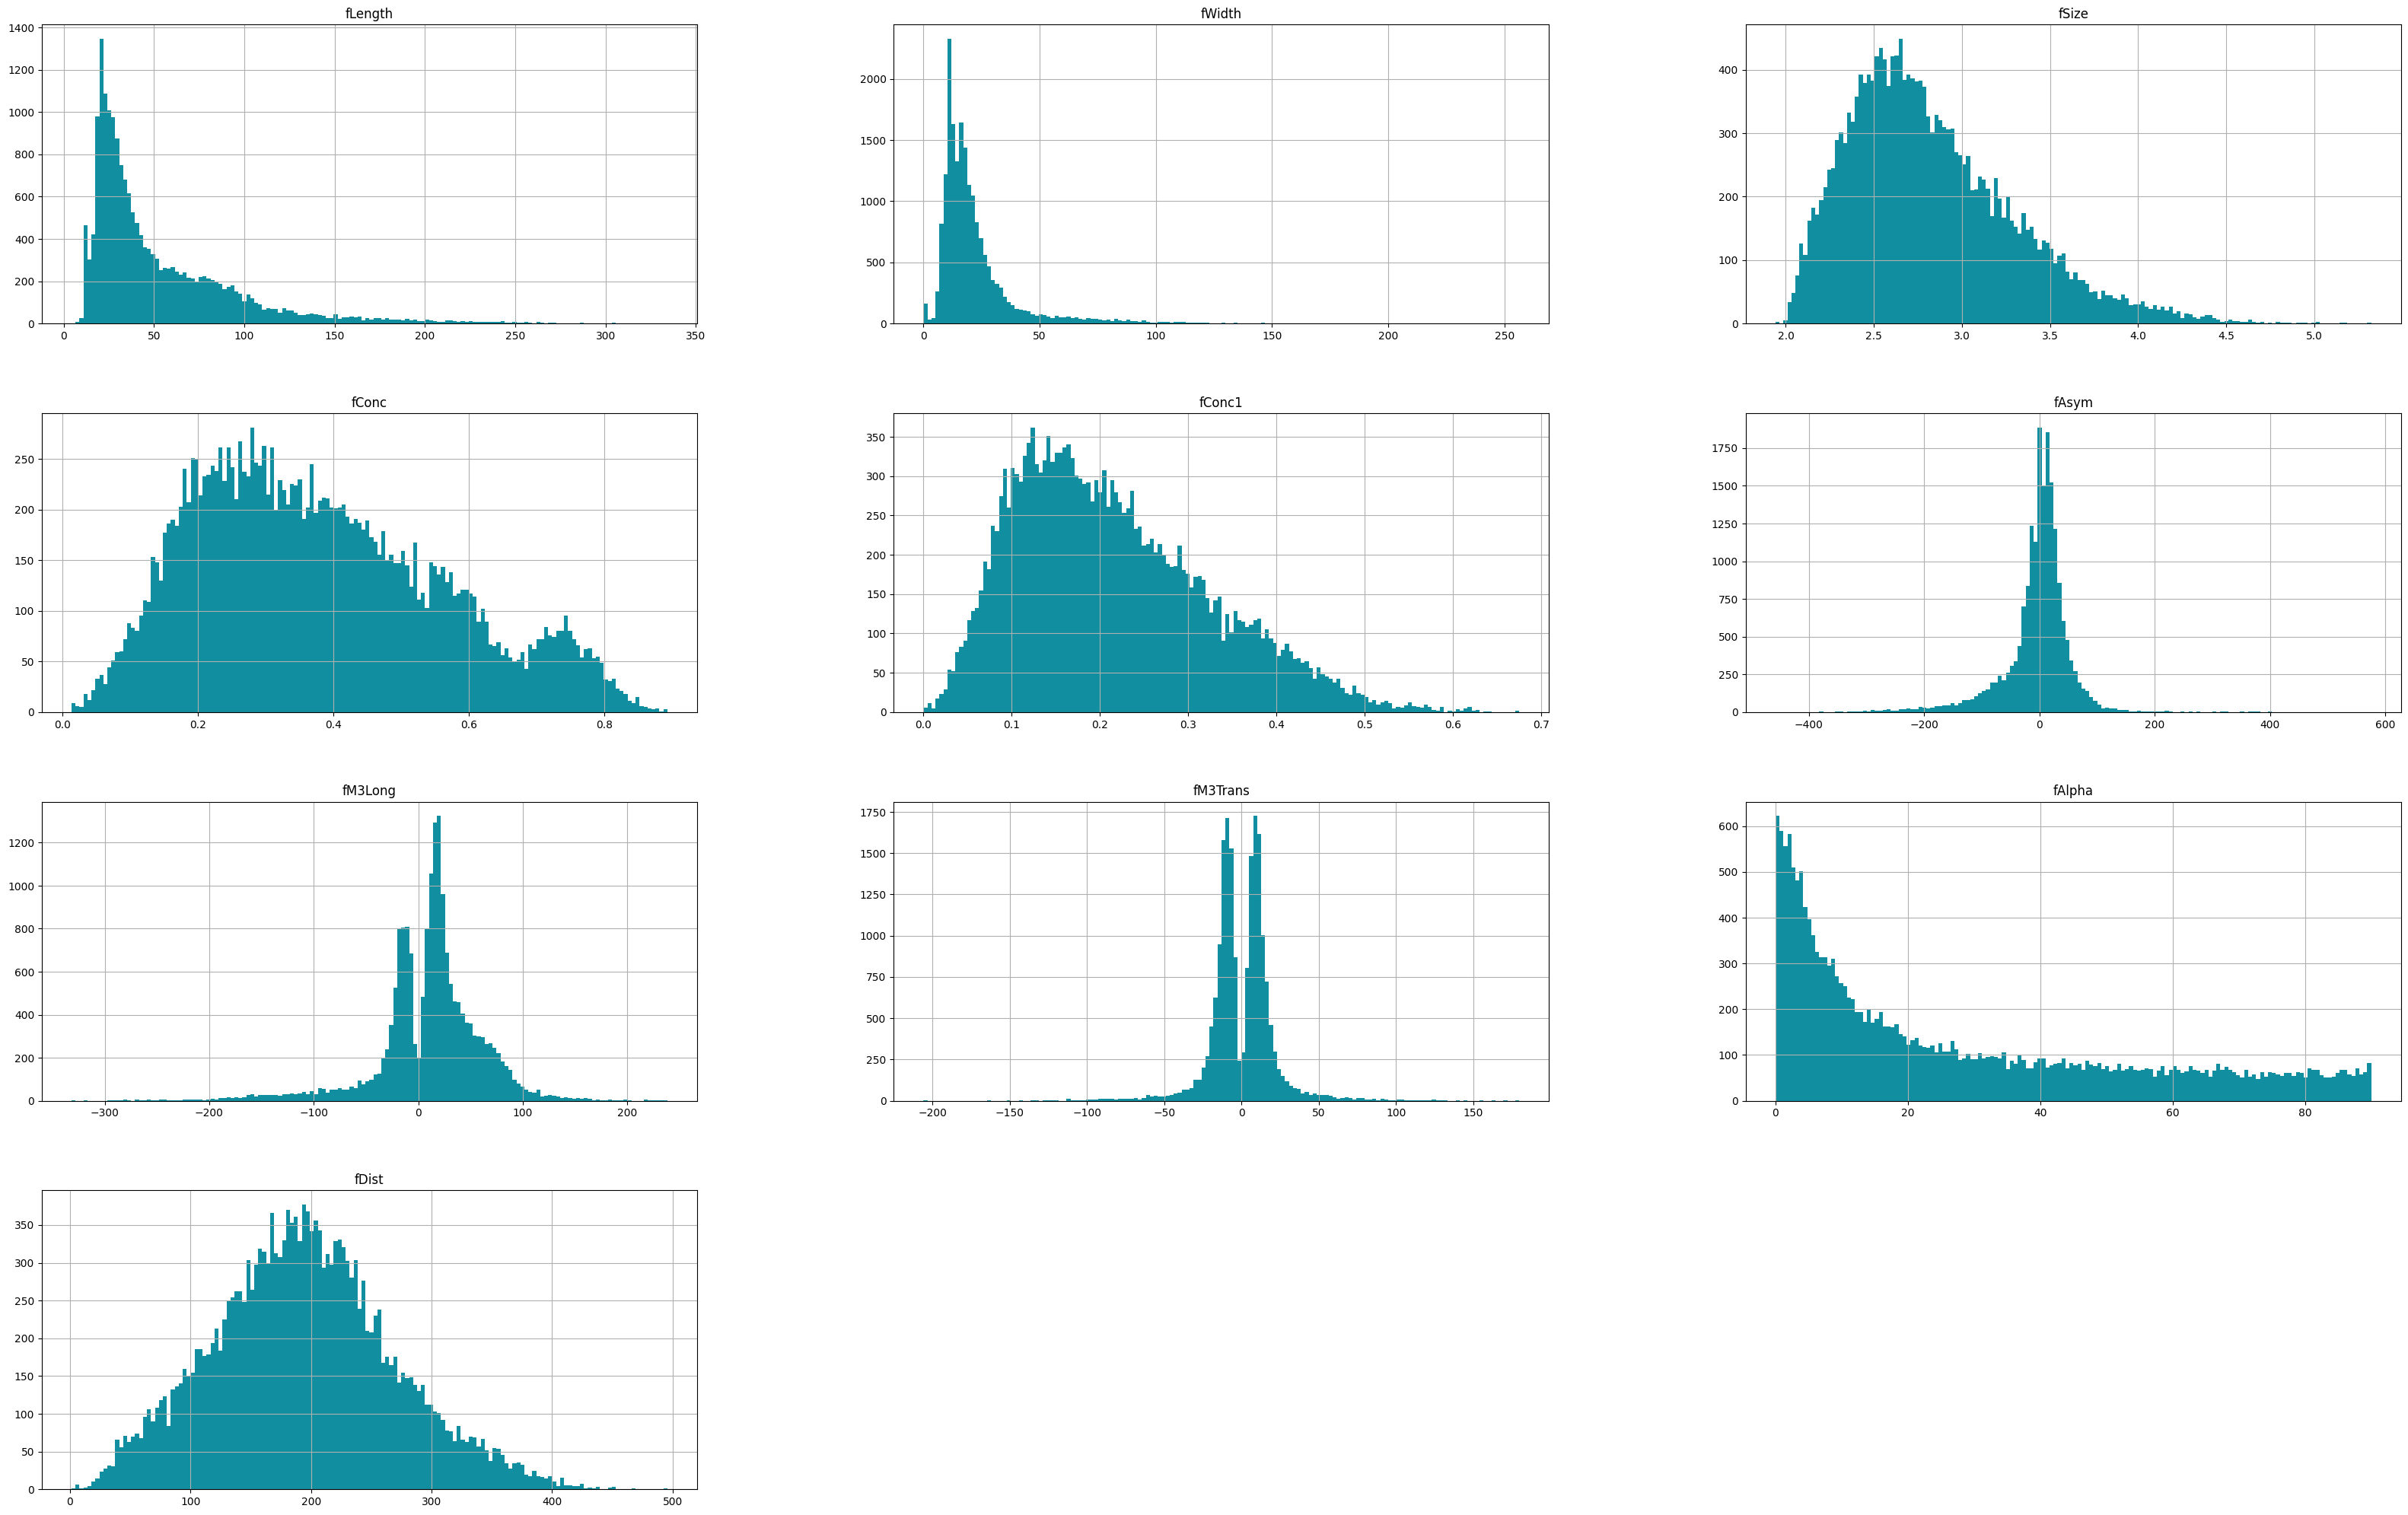

In [25]:
#histograma para poder ver la densidad de la data en determimdada punto de los diferentes columnas

data.hist(
    figsize=[40,25],
    bins= 150,
    color="#118FA0",
    )
plt.show()

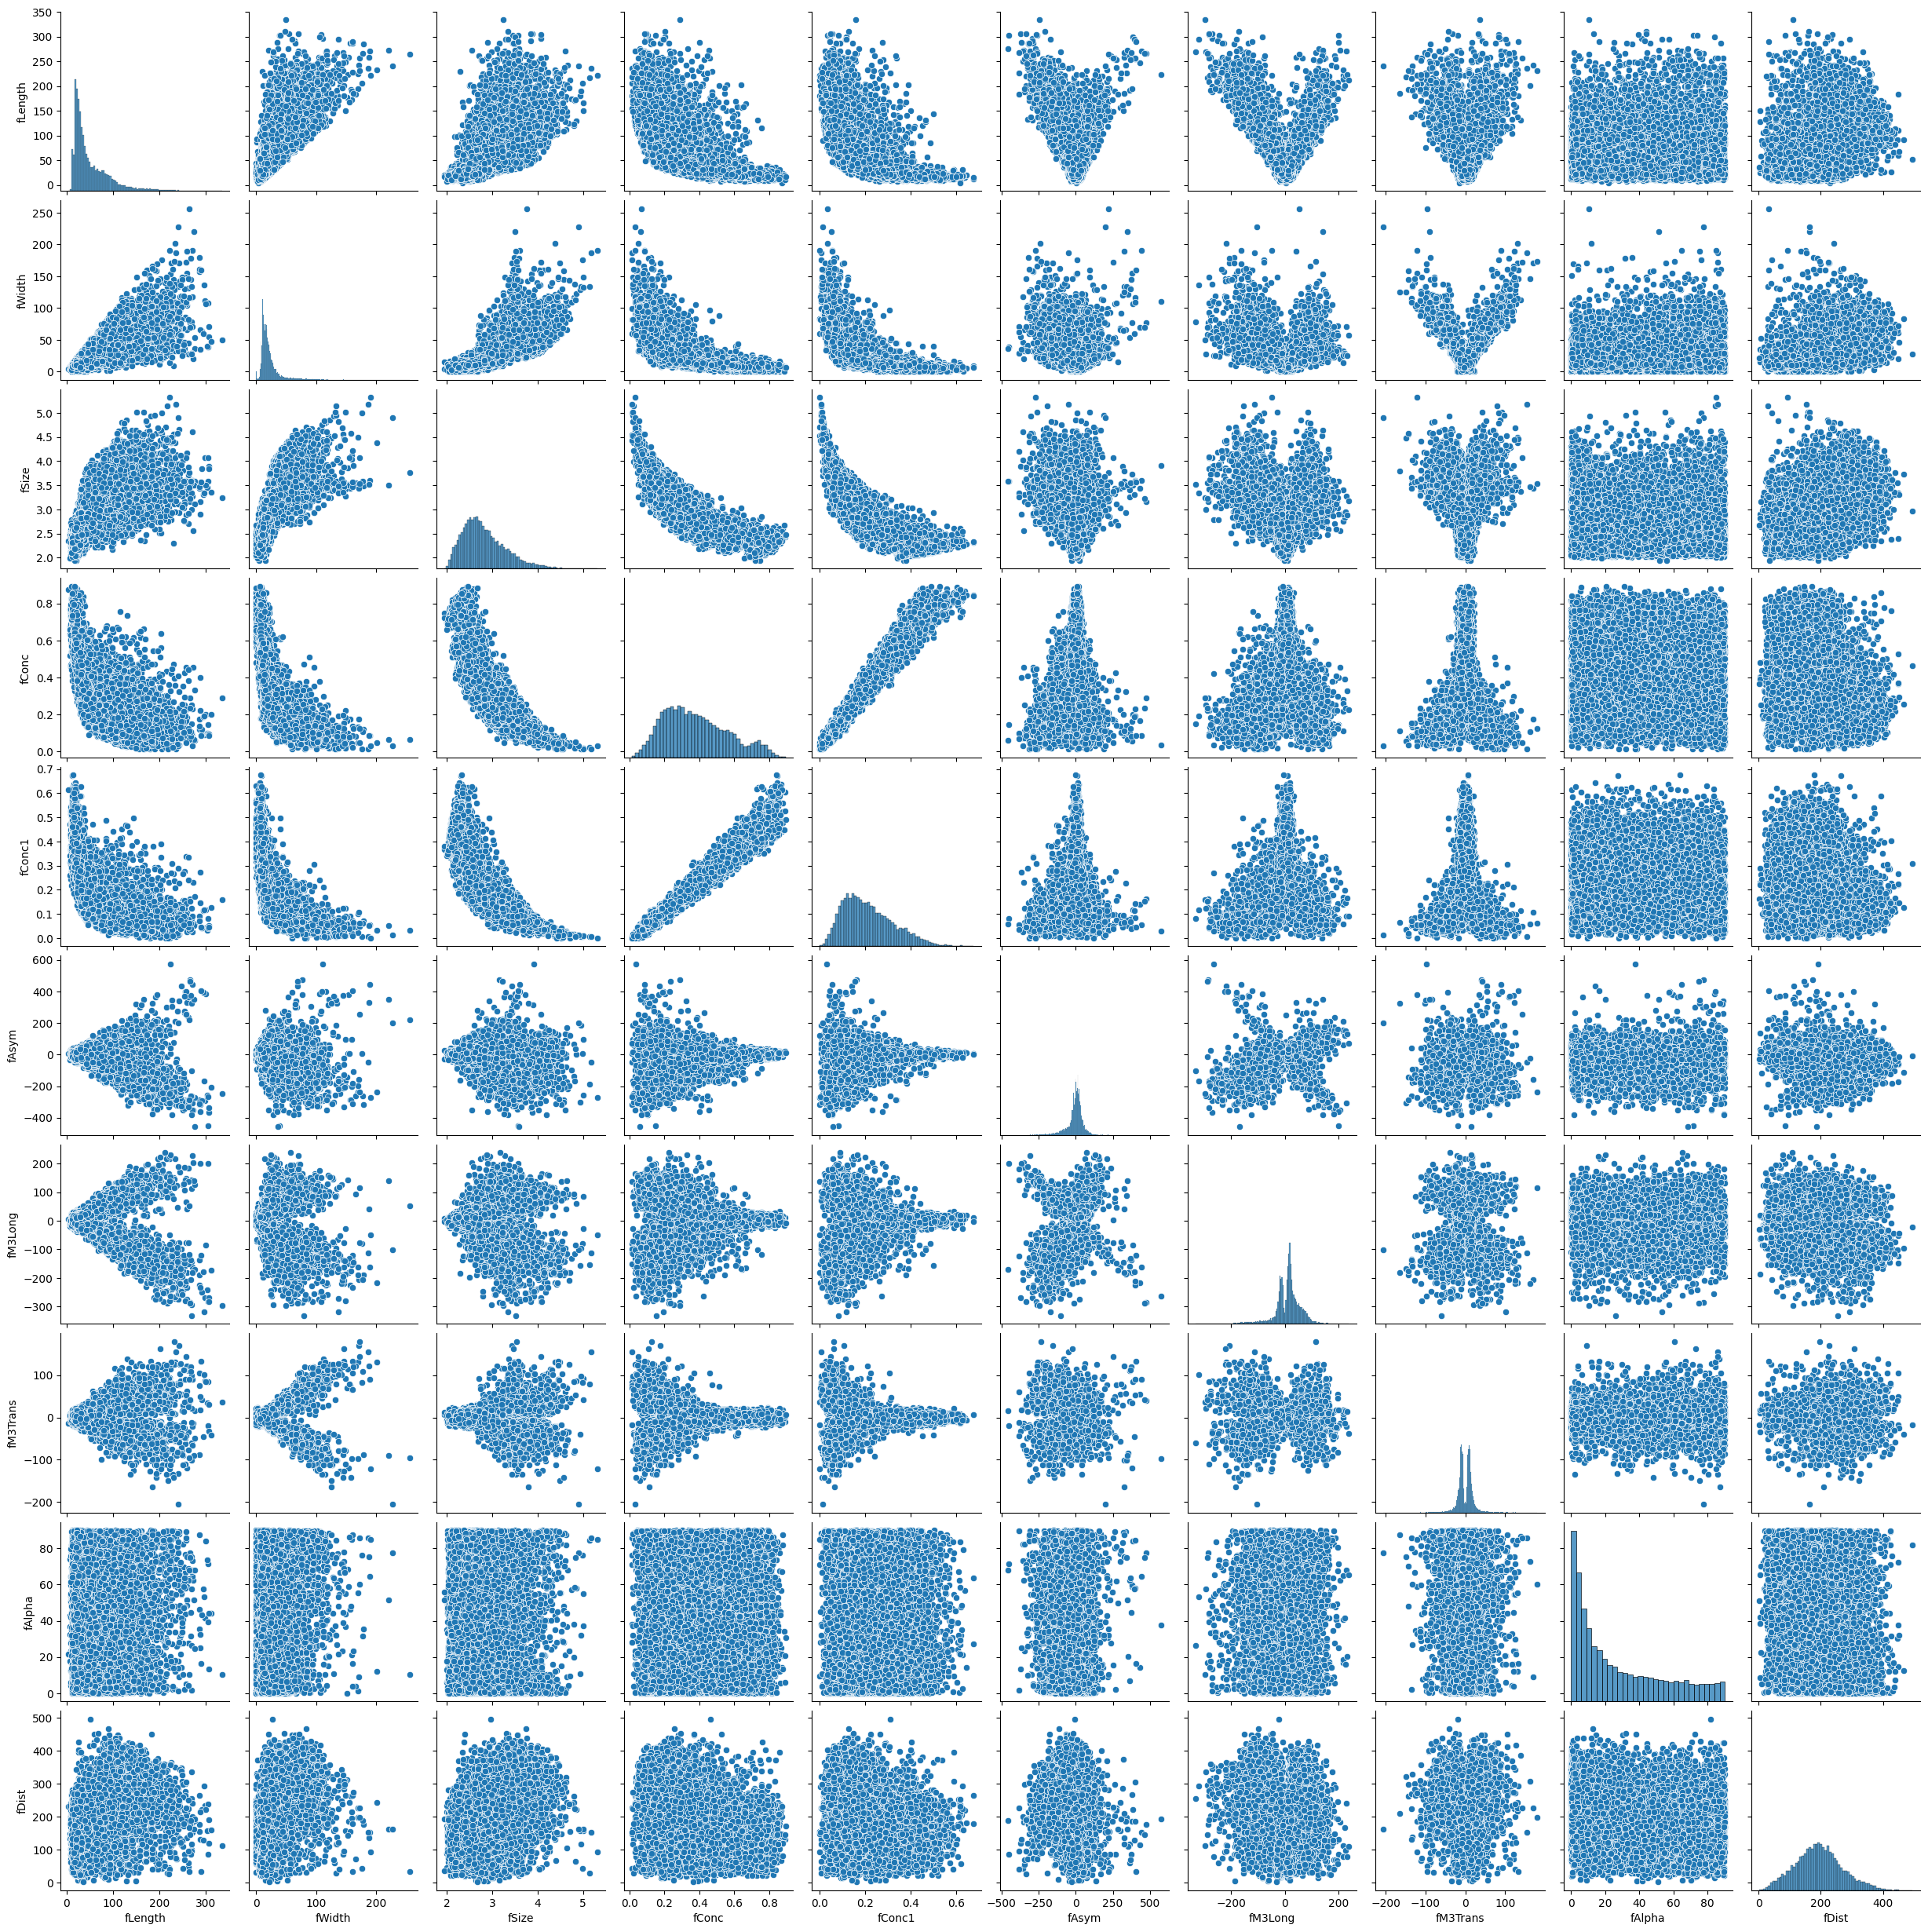

In [26]:
sns.pairplot(data)

In [27]:
import numpy as np

# Asigna 1 a "g" y 0 a "h"
data['class'] = np.where(data['class'] == "g", 1, 0)

# Verifica la información de la columna 'class'
data['class'].value_counts()


class
1    12332
0     6688
Name: count, dtype: int64

##### ***X_TRAIN AND Y_TRAIN, X_TEST, Y_TEST***

[[ 2.6449 40.092 ]
 [ 2.5185  6.3609]
 [ 4.0612 76.96  ]
 ...
 [ 3.4483 30.2987]
 [ 3.9939 84.6874]
 [ 3.2093 52.731 ]]
Epoch 0, loss: 19.080116999374777 (size of training (30))


Epoch 100, loss: 16.174665409066524 (size of training (30))
Epoch 200, loss: 16.37423864981434 (size of training (30))
Epoch 300, loss: 11.019651798032315 (size of training (30))
Epoch 400, loss: 8.21262156676514 (size of training (30))
Epoch 500, loss: 10.546303102547334 (size of training (30))
Epoch 600, loss: 10.72914769355494 (size of training (30))
Epoch 700, loss: 8.766602683664518 (size of training (30))
Epoch 800, loss: 1.6398497463534143 (size of training (30))
Epoch 900, loss: 18.772211548686634 (size of training (30))
Epoch 1000, loss: 10.404880149481443 (size of training (30))
Epoch 1100, loss: 7.076295966653377 (size of training (30))
Epoch 1200, loss: 11.137322021092531 (size of training (30))
Epoch 1300, loss: 12.756666996827143 (size of training (30))
Epoch 1400, loss: 11.242548484720837 (size of training (30))
Epoch 1500, loss: 1.8370663301886536 (size of training (30))
Epoch 1600, loss: 11.237293783580574 (size of training (30))
Epoch 1700, loss: 7.077863256319857 (si

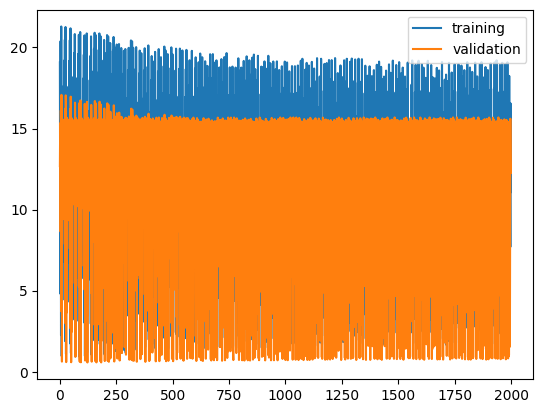

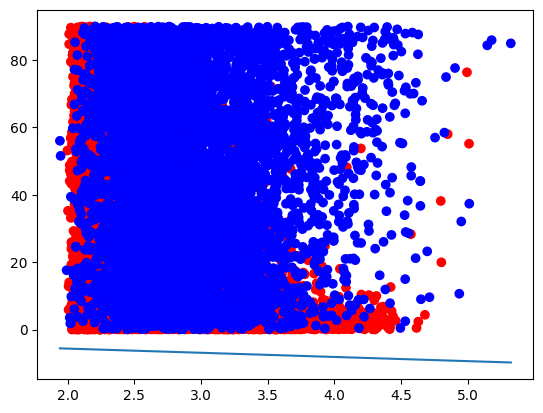

accuracy :0.6356877323420075


In [28]:


X = data.drop('class' , axis = 1)
Y = data['class']

#dataframe to np.array
X_numpy = np.array(X)

X_numpy = X_numpy[:, [2, 8]]

Y_numpy = np.array(Y)

print(X_numpy)

#split dataset
x_train , x_validation , x_test , y_train , y_validation , y_test = data_split(X_numpy , Y_numpy)


#hiperparameters
alpha = 0.15
epoch = 2000

batch_size = 30

#model
model_Regression_Logistic = Regression_Logistic(alpha,epoch,batch_size)

#training 
model_Regression_Logistic.train(x_train,y_train, x_validation ,y_validation)


#plot loss training 
print(f'El X{X}')
model_Regression_Logistic.plot_loss()
model_Regression_Logistic.plot2d(X_numpy[:,0].T,X_numpy[:, 1].T,Y)


#plot loos predict
prediction_test = model_Regression_Logistic.prediction(x_test)

#metrics
accuracy_ = accuracy_score(y_test,prediction_test)

print(f'accuracy :{accuracy_}')

### CONCLUSIONS

- It seems that with all the features ***X { fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist }***, the loss value does not decrease, and an overflow occurs. Therefore, it is better to work with a different type of classification model for this dataset.

- We see that the classifications in the visualizations are not good to be able to separate with a line, so we would have to take into account another type of classification or another model.

## ***EXAMPLE 2*** 

- Dataset : testing.csv

Epoch 0, loss: 0.9723522289948022 (size of training (30))


Epoch 100, loss: 0.5330095038670603 (size of training (30))
Epoch 200, loss: 0.3874122015055463 (size of training (30))
Epoch 300, loss: 0.3173106161907867 (size of training (30))
Epoch 400, loss: 0.2757795486143193 (size of training (30))
Epoch 500, loss: 0.24800943325392868 (size of training (30))
Epoch 600, loss: 0.22794593164074714 (size of training (30))
Epoch 700, loss: 0.21265703131276895 (size of training (30))
Epoch 800, loss: 0.20054660864638418 (size of training (30))
Epoch 900, loss: 0.19066854835462926 (size of training (30))


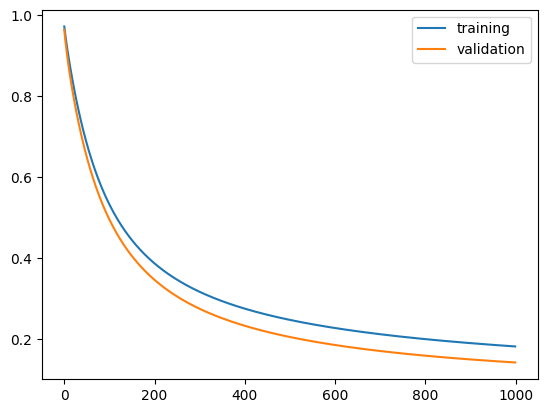

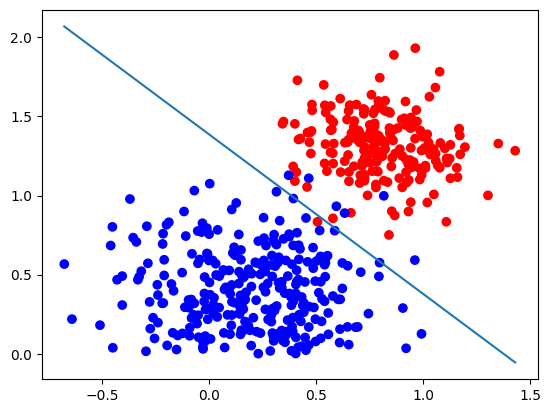

ACCURACY :0.98989898989899


In [29]:
#read data set
data_new = pd.read_csv('D:/Documentos/MISCURSOS/Proyectos Git Hub\MACHINE-LEARNIG/supervised_Learning/classification/dataset_classification/testing.csv')


# dataframe to np.array
X0 = np.array(data_new['C1'])
X1 = np.array(data_new['C2'])


X_NEW = np.array(data_new.drop('CLASE' ,axis= 1))
Y_NEW = np.array(data_new['CLASE'])


x_train_NEW , x_validation_NEW , x_test_NEW , y_train_NEW , y_validation_NEW , y_test_NEW = data_split(X_NEW , Y_NEW)


#hiperparameters
alpha_NEW = 0.15
epoch_NEW = 1000
batch_size_NEW =30


#model
model_Regression_Logistic_NEW = Regression_Logistic(alpha_NEW,epoch_NEW,batch_size_NEW)

#training 
model_Regression_Logistic_NEW.train(x_train_NEW,y_train_NEW, x_validation_NEW ,y_validation_NEW)


#plot loss training 

model_Regression_Logistic_NEW.plot_loss()
model_Regression_Logistic_NEW.plot2d(X_NEW[:,0].T,X_NEW[:, 1].T,Y_NEW)

#plot2d


#testing
predic_new = model_Regression_Logistic_NEW.prediction(x_test_NEW)

#metrics
accuracy_new = accuracy_score(y_test_NEW,predic_new)

print(f'ACCURACY :{accuracy_new}')

### CONCLUSIONS
- In this case we can separate our dataset appropriately, and get a very good accuracy result.

## EXAMEPLE 3: WITH LIBRARY SKLEARN 
-  dataset :magic04.csv

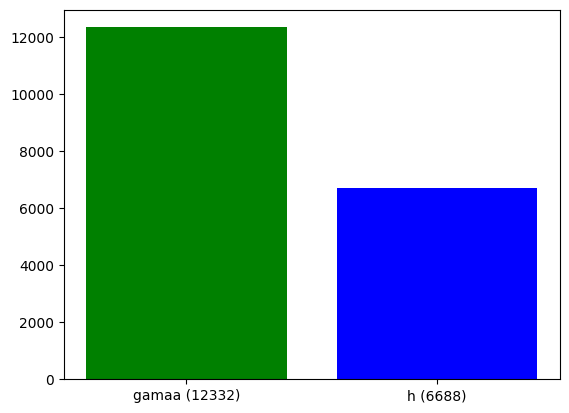

In [30]:
#librarys

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import  matplotlib.pyplot as plt
#split dataset for train and test



num_gamma = 12332
num_h = 6688

plt.bar(["gamaa (%d)"% num_gamma, "h (%d)" % num_h],
        [num_gamma, num_h],
        color = ["green", "blue"],
        width = 0.8)

plt.show()

### *OVERSAMPLING DATA WITH REPLACEMENT*

In [31]:
data_con_1 = data[data["class"] == 1] #count total 12332
data_con_0 = data[data["class"] == 0] #count total 6688

sobremostreo_0 =  data_con_0.sample(n= 12332 , replace = True, random_state= 42)
sobremostreo_0


fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
13192   35.8637  14.6348  2.7789  0.3794  0.1955   13.5855   20.4734   
17722  183.0060  67.1351  3.9101  0.0776  0.0456 -182.9300  111.7160   
17558   58.9828  34.7276  3.5862  0.1673  0.0838   27.5819   48.1584   
17523   33.3430   8.3643  2.3936  0.4970  0.2687   -0.2477   10.0291   
16104   85.5566  33.2663  3.0485  0.3102  0.1951  -55.8671  -55.6300   
...         ...      ...     ...     ...     ...       ...       ...   
16423   31.3586  22.7492  2.9204  0.2691  0.1532   10.7536   23.4355   
13573   26.7820   6.9718  2.5551  0.7409  0.3719   21.5117  -15.2322   
18100   41.8509  17.8588  2.7981  0.2819  0.1492    6.6171  -20.3582   
18581   25.8227  16.4357  2.5211  0.5000  0.3027   -0.9485   25.6125   
13022   20.5716  12.8988  2.3191  0.4508  0.2326  -12.5596   -7.2786   

       fM3Trans   fAlpha     fDist  class  
13192   -9.0084  76.1853  240.4400      0  
17722   16.1009  14.6853  184.5620      0  
17558   18.6140  16.8359  219.0220      0  
17523   -2.7907  61.4890  210.0610      0  
16104  -25.2963  29.2049  324.5050      0  
...         ...      ...       ...    ...  
16423  -10.4550  37.5430  138.8610      0  
13573    6.2039  11.3940  152.0130      0  
18100   11.0965  89.0498  232.8534      0  
18581   17.5177   0.9990  186.2970      0  
13022   -7.3644   7.4640   77.9709      0  

[12332 rows x 11 columns]

### *SUB-SAMPLING WITHOUT REPLACEMENT*

In [32]:
submuestreo_1 = data_con_1.sample(n=6688, replace= False , random_state= 42)
submuestreo_1


fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
8917   41.8269  26.3680  3.0422  0.2350  0.1202  24.1335  40.1360   20.4737   
772    59.0164  18.0200  3.3073  0.2587  0.1422  57.7010  59.9175   15.4044   
12252  15.0205  12.1918  2.3560  0.6608  0.3370   1.9014  -2.0715    3.6258   
7793   51.4720  10.4108  2.5453  0.3276  0.1838  73.5451  17.7028   -7.1886   
6601   25.3814  15.7361  2.6186  0.4188  0.2419  27.8332  17.8775    5.4552   
...        ...      ...     ...     ...     ...      ...      ...       ...   
12034  97.7697  52.4273  4.2823  0.0722  0.0364  60.0857  78.9373  -34.8084   
4661   40.1304  18.5129  2.8041  0.2527  0.1609  16.2275  20.2096   13.6330   
4078   21.1123  15.8118  2.5198  0.4411  0.2341  12.2701  -8.1560  -11.7698   
6054   98.4893  38.6759  3.9381  0.1391  0.0814 -52.4502  61.9751   13.9793   
10410  21.0810   7.1133  2.0846  0.6749  0.3416   0.2413  -4.9562    6.2181   

        fAlpha     fDist  class  
8917   29.3920  173.6130      1  
772     1.3107  237.6220      1  
12252  89.2740  105.2140      1  
7793   16.7782  176.5590      1  
6601   10.1725   80.3929      1  
...        ...       ...    ...  
12034   2.5960  270.2520      1  
4661   13.0774  224.1660      1  
4078   75.2845  216.2050      1  
6054    4.9090  347.4560      1  
10410  61.0980  216.5580      1  

[6688 rows x 11 columns]

### *PREPARING THE DATA FOR THREE CLASSIFIER*

In [33]:
#sobremuestreo 
sobremuestreo = pd.concat([sobremostreo_0, data_con_1])
x_sobremostreo = sobremuestreo.drop('class', axis= 1)
y_sobremostreo = sobremuestreo['class']
y_sobremostreo 

#submuestreo
submuestreo = pd.concat([submuestreo_1 , data_con_0 ])
x_submuestreo = sobremuestreo.drop('class', axis=1)
y_submuestreo = sobremuestreo['class']

#desbalanceados 
desbalanceados = data
x_desbalanceados = desbalanceados.drop('class', axis = 1)
y_desbalanceados = desbalanceados['class']

In [34]:

#create model- desbalanceado 

model = LogisticRegression(max_iter=20000)

x_desbalanceados_n = np.array(x_desbalanceados)
y_desbalanceados_n = np.array(y_desbalanceados)
#split
x_tr, x_ts, y_tr , y_ts = train_test_split (x_desbalanceados_n,y_desbalanceados_n,test_size = 0.2, shuffle = True)

#training model 
model.fit(x_tr,y_tr)


#predic model 
predic = model.predict(x_ts)

#accuracy
accuracy = accuracy_score(y_ts, predic)
print(f"accuracy es de: {accuracy}")

#report with metrics
report = classification_report(y_ts,predic)

print(f"el report es de {report}")

accuracy es de: 0.7981072555205048
el report es de               precision    recall  f1-score   support

           0       0.76      0.60      0.67      1315
           1       0.81      0.90      0.85      2489

    accuracy                           0.80      3804
   macro avg       0.79      0.75      0.76      3804
weighted avg       0.79      0.80      0.79      3804



In [35]:

#create model- sobremuestreo

model_sobremuestreo = LogisticRegression(max_iter=40000)

x_sobremuestreo_n = np.array(x_sobremostreo) 
y_sobremuestreo_n = np.array(y_sobremostreo) 

x_tr_sobre, x_ts_sobre, y_tr_sobre , y_ts_sobre = train_test_split (x_sobremuestreo_n,y_sobremuestreo_n,test_size = 0.2, shuffle= True)

#training model 
model_sobremuestreo.fit(x_tr_sobre,y_tr_sobre)


#predic model 
predic_sobre = model_sobremuestreo.predict(x_ts_sobre)

#accuracy
accuracy_sobre = accuracy_score(y_ts_sobre, predic_sobre)
print(f"accuracy es de: {accuracy_sobre}")

#report with metrics
report_sobre = classification_report(y_ts_sobre,predic_sobre)

print(f"el report es de {report_sobre}")

accuracy es de: 0.7733630650719643
el report es de               precision    recall  f1-score   support

           0       0.80      0.72      0.76      2462
           1       0.75      0.82      0.78      2471

    accuracy                           0.77      4933
   macro avg       0.78      0.77      0.77      4933
weighted avg       0.78      0.77      0.77      4933



In [36]:

#create model- sobremuestreo

model_sub = LogisticRegression(max_iter=2000)

x_sub_n = np.array(x_submuestreo) 
y_sub_n = np.array(y_submuestreo) 

x_tr_sub, x_ts_sub, y_tr_sub , y_ts_sub = train_test_split (x_sub_n,y_sub_n,test_size = 0.2, shuffle= True)
#training model 
model_sub.fit(x_tr_sub,y_tr_sub)


#predic model 
predic_sub = model_sub.predict(x_ts_sub)

#accuracy
accuracy_sub = accuracy_score(y_ts_sub, predic_sub)
print(f"accuracy es de: {accuracy_sub}")

#report with metrics
report_sub = classification_report(y_ts_sub,predic_sub)

print(f"el report es de {report_sub}")

accuracy es de: 0.765862558280965
el report es de               precision    recall  f1-score   support

           0       0.79      0.72      0.76      2478
           1       0.74      0.81      0.78      2455

    accuracy                           0.77      4933
   macro avg       0.77      0.77      0.77      4933
weighted avg       0.77      0.77      0.77      4933

